K-means clustering 4

In [ ]:
# https://github.com/immanuvelprathap/KMeans-Clustering-Unsupervised-ML-Projects/blob/main/Warehouse-Inventory-Case-Study/Kmeans-Clustering-Warehouse-Inventory-Project.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Display max columns and rows
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [3]:
data = pd.read_excel("/content/Product groups.xlsx")

In [4]:
data

,Product Family,Sum of count of orders,Avg product weight in Kg
0,agro industry and commerce,212,5.263405
1,foods,510,0.923415
2,food drinks,278,1.307933
3,Arts,209,1.691764
4,arts and crafts,24,1.164579
5,artigos de festas,43,2.705769
6,artigos de natal,153,1.849815
7,Audio,364,0.641638
8,automotive,4235,2.654651
9,babies,3065,3.655202


In [5]:
data.columns

Index(['Product Family', 'Sum of count of orders', 'Avg product weight in Kg'], dtype='object')

In [6]:
data.shape

(73, 3)

In [7]:
data.isnull().sum()

,0
Product Family,0
Sum of count of orders,0
Avg product weight in Kg,0


<Axes: xlabel='Sum of count of orders', ylabel='Avg product weight in Kg'>

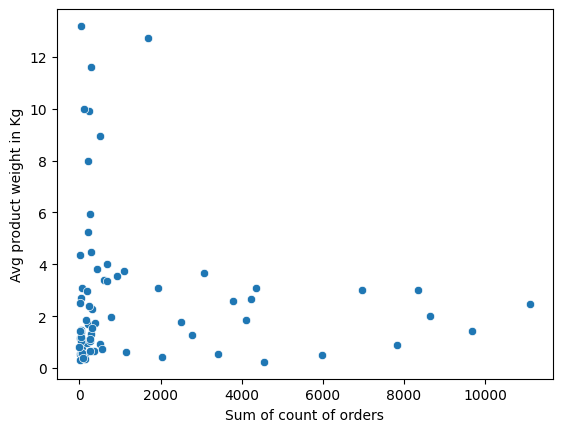

In [8]:
sns.scatterplot(data=data, x='Sum of count of orders',y='Avg product weight in Kg' )

In [ ]:
# If we try clustering in the current state, the scale difference will likely cause the X-axis (order count) to dominate. We need to bring both axes to a similar range
# so that balanced clusters can form.

In [ ]:
# To address this, I plan to apply a MinMaxScaler. MinMaxScaler subtracts the minimum value of each feature from every data point and then divides by the feature’s range (maximum minus minimum),
# rescaling values to between 0 and 1. This preserves the original distribution’s shape while ensuring all features share the same scale, preventing any single axis from exerting excessive influence
# during clustering.

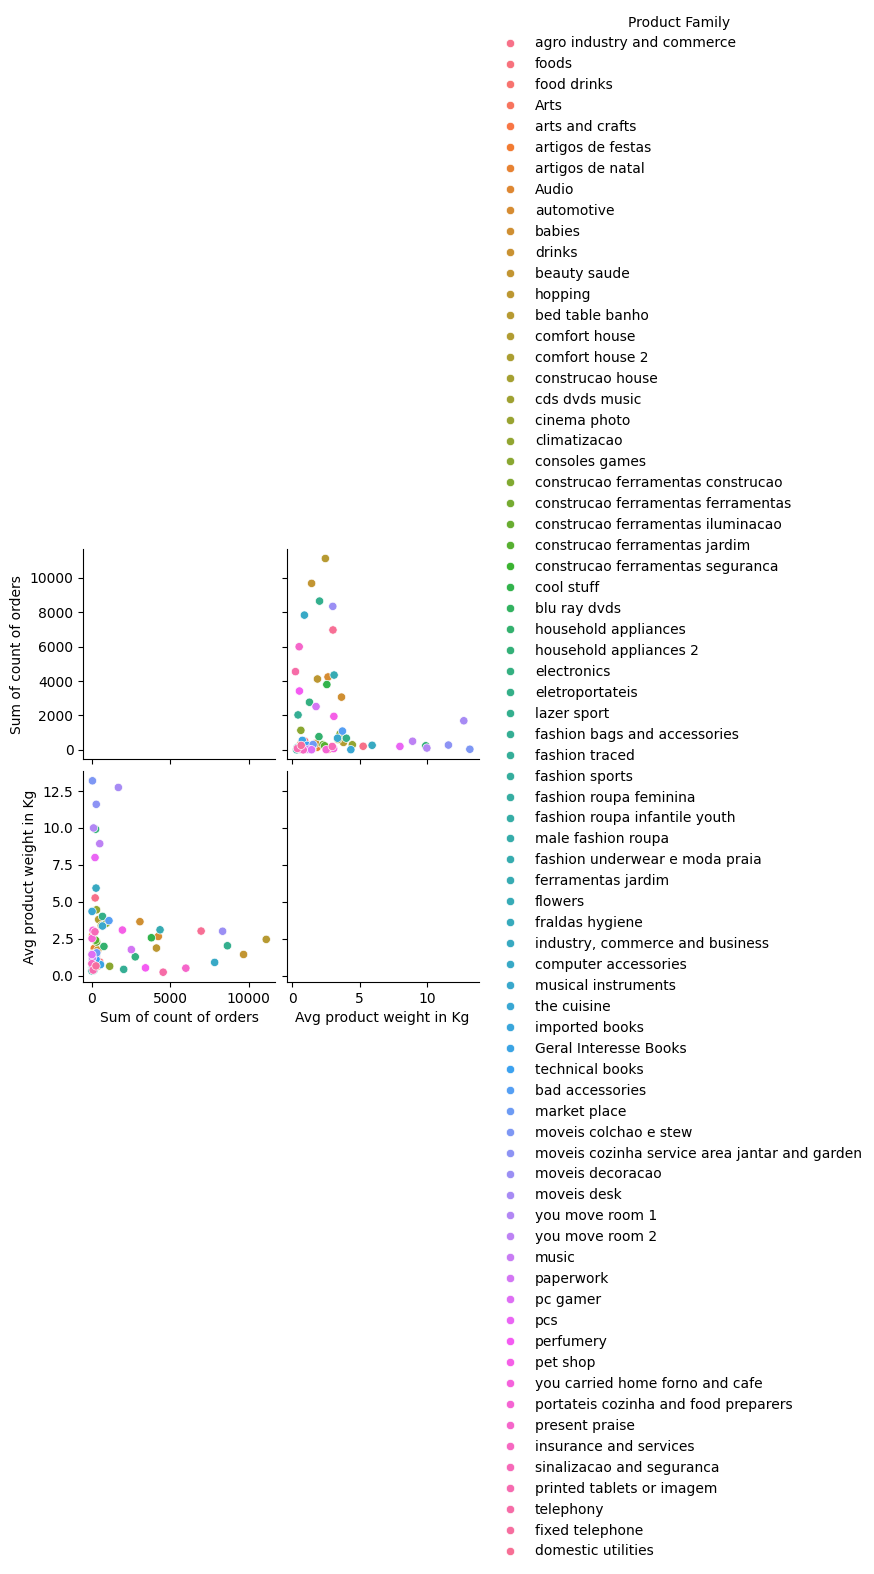

In [9]:
sns.pairplot(data, hue='Product Family')
plt.savefig('Pairplot.png')

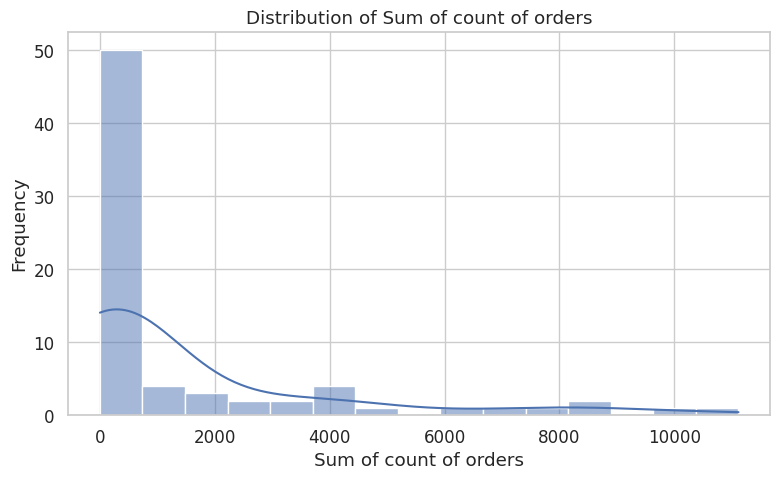

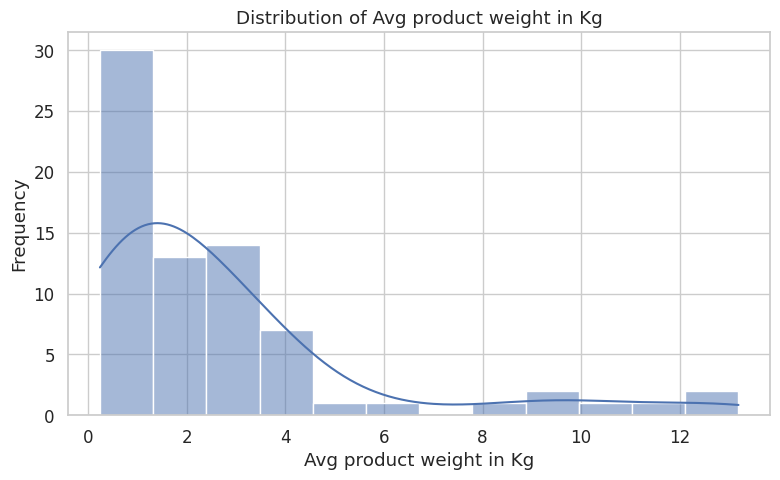

In [11]:
sns.set(style='whitegrid',
        palette='deep',
        font_scale=1.1,
        rc={'figure.figsize': (8, 5)})

cols = ['Sum of count of orders', 'Avg product weight in Kg']

for col in cols:
    plt.figure()
    sns.histplot(data[col].dropna(),
                 kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

    # plt.savefig(f'{col.replace(" ", "_")}_distplot.png',
    #             bbox_inches='tight')

    plt.show()

FEATURE ENGINEERING & FEATURE SCALING :

In [ ]:
# Numerical variables are following a Right-skewed distrubtion.So, performing a log transformation will bring the distrubtion closer to the gaussian-distribution.

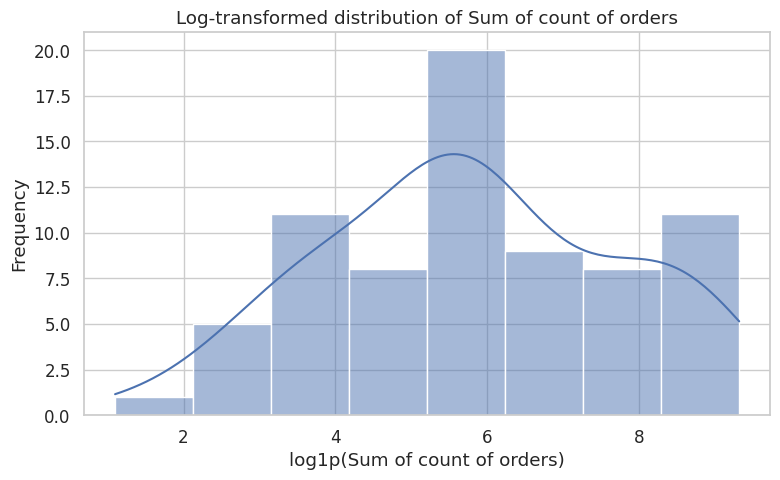

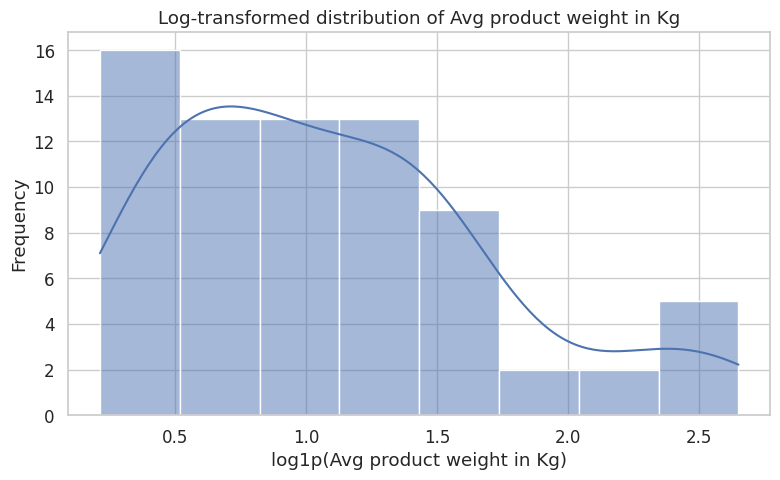

In [12]:
sns.set(style='whitegrid',
        palette='deep',
        font_scale=1.1,
        rc={'figure.figsize': (8, 5)})

cols = ['Sum of count of orders', 'Avg product weight in Kg']

for col in cols:
    data[col] = np.log1p(data[col])

    fig, ax = plt.subplots()
    sns.histplot(data[col].dropna(), kde=True, ax=ax)

    ax.set_title(f'Log-transformed distribution of {col}')
    ax.set_xlabel(f'log1p({col})')
    ax.set_ylabel('Frequency')
    fig.tight_layout()

    plt.show()

#    filename = f'{col.replace(" ", "_")}_log_distplot.png'
#    fig.savefig(filename, bbox_inches='tight')
#    plt.close(fig)

MinMax Normalization:

In [13]:
#create two separate variables to get the count and weight for the Product family after applying MinMax Normalization!

data['count_variable'] = (data['Sum of count of orders'] - data['Sum of count of orders'].min()) / (data['Sum of count of orders'].max() - data['Sum of count of orders'].min())

data['weight_variable'] = (data['Avg product weight in Kg'] - data['Avg product weight in Kg'].min()) / (data['Avg product weight in Kg'].max() - data['Avg product weight in Kg'].min())

In [14]:
data

,Product Family,Sum of count of orders,Avg product weight in Kg,count_variable,weight_variable
0,agro industry and commerce,5.361292,1.834724,0.518730,0.664865
1,foods,6.236370,0.654102,0.625219,0.181052
2,food drinks,5.631212,0.836352,0.551577,0.255737
3,Arts,5.347108,0.990197,0.517004,0.318782
4,arts and crafts,3.218876,0.772226,0.258017,0.229459
5,artigos de festas,3.784190,1.309891,0.326811,0.449791
6,artigos de natal,5.036953,1.047254,0.479261,0.342164
7,Audio,5.899897,0.495694,0.584274,0.116138
8,automotive,8.351375,1.296000,0.882597,0.444099
9,babies,8.028129,1.537985,0.843260,0.543263


In [15]:
data_copy = data[['Product Family', 'count_variable', 'weight_variable']]
clustering = KMeans(n_clusters=5)
clustering.fit(data_copy[['count_variable','weight_variable']])
data_copy['count and weight Cluster'] =clustering.labels_
data_copy.head()

,Product Family,count_variable,weight_variable,count and weight Cluster
0,agro industry and commerce,0.518730,0.664865,4
1,foods,0.625219,0.181052,3
2,food drinks,0.551577,0.255737,3
3,Arts,0.517004,0.318782,4
4,arts and crafts,0.258017,0.229459,0


In [16]:
clustering.cluster_centers_

array([[0.27672597, 0.20784295],
       [0.90114775, 0.39527319],
       [0.53639285, 0.88742537],
       [0.63849987, 0.13748024],
       [0.58298245, 0.47812529]])

In [17]:
clustering.inertia_

1.7812009197916805

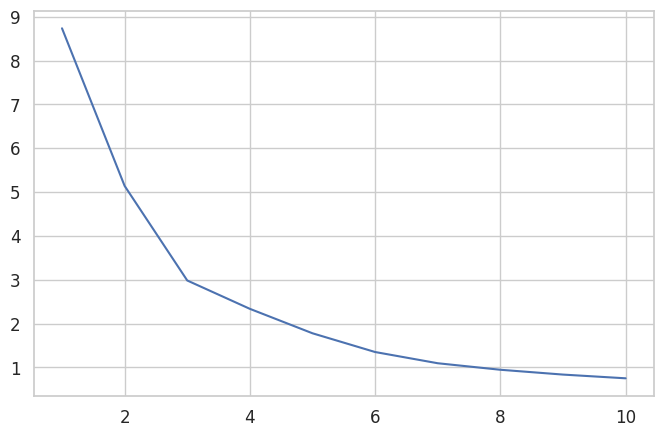

In [18]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data_copy[['count_variable','weight_variable']])
    intertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11),intertia_scores)

In [20]:
data_copy.groupby('count and weight Cluster')[['count_variable', 'weight_variable']].mean()

data_copy.groupby('count and weight Cluster').agg({
    'count_variable': 'mean',
    'weight_variable': 'mean'
})


,count_variable,weight_variable
count and weight Cluster,,
0,0.276726,0.207843
1,0.901148,0.395273
2,0.536393,0.887425
3,0.638500,0.137480
4,0.582982,0.478125


In [21]:
Average_count= data_copy.groupby(['count and weight Cluster'])['count_variable'].mean()

In [22]:
Average_weight= data_copy.groupby(['count and weight Cluster'])['weight_variable'].mean()

In [24]:
df = (
    data_copy
      .groupby('count and weight Cluster')[['count_variable', 'weight_variable']]
      .mean()
      .reset_index()
)

<Axes: xlabel='count_variable', ylabel='weight_variable'>

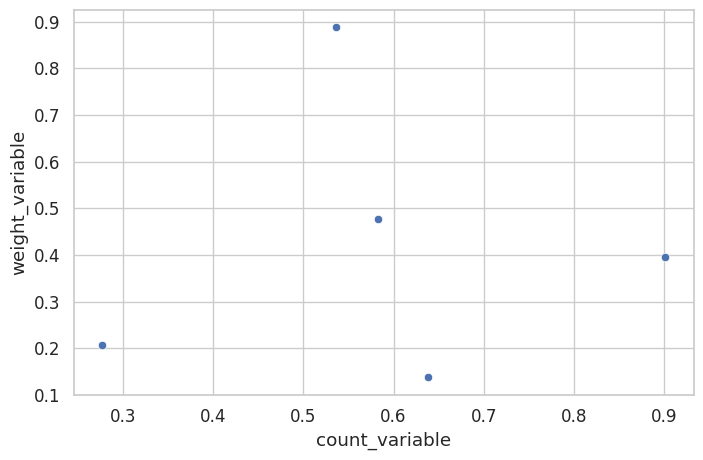

In [25]:
sns.scatterplot(data=df, x='count_variable',y='weight_variable')

In [26]:
centroids =pd.DataFrame(clustering.cluster_centers_)
centroids.columns = ['x','y']

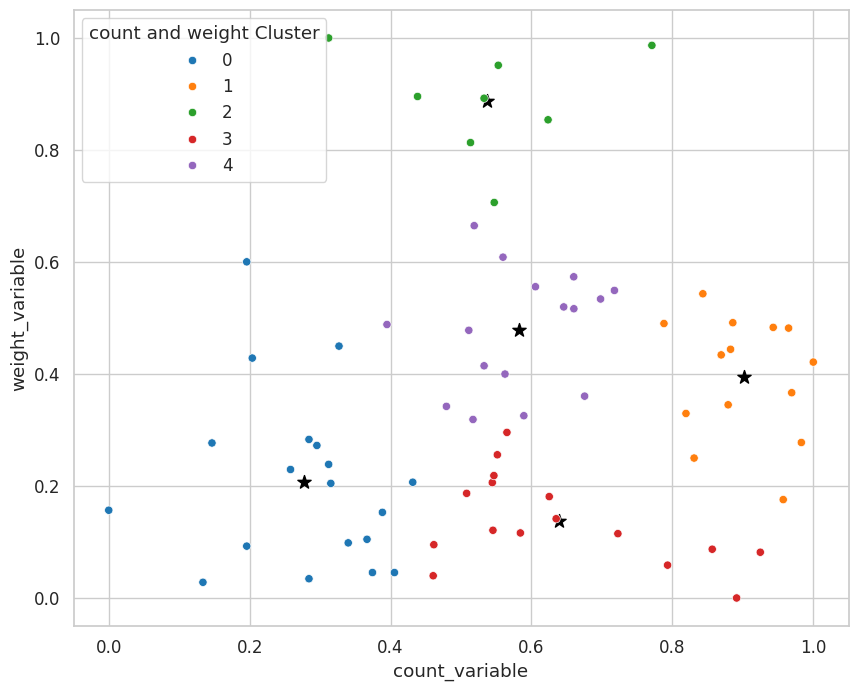

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(x=centroids['x'],y=centroids['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data_copy, x ='count_variable',y='weight_variable',hue='count and weight Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [28]:
Final_data = pd.concat([data_copy,df])
Final_data

,Product Family,count_variable,weight_variable,count and weight Cluster
0,agro industry and commerce,0.518730,0.664865,4
1,foods,0.625219,0.181052,3
2,food drinks,0.551577,0.255737,3
3,Arts,0.517004,0.318782,4
4,arts and crafts,0.258017,0.229459,0
5,artigos de festas,0.326811,0.449791,0
6,artigos de natal,0.479261,0.342164,4
7,Audio,0.584274,0.116138,3
8,automotive,0.882597,0.444099,1
9,babies,0.843260,0.543263,1
